In [20]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import joblib as jb
import helper_functions as hlf
from keras.models import Sequential, load_model, Model
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from keras.utils import to_categorical

plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
plt.rcParams['figure.figsize'] = 10, 10

%matplotlib inline
# %reload_ext autoreload
# %autoreload 2

In [35]:
# load supervised model
weights_path = './model_weights/'
weights_name = 'sixth2000'
supervised_model = hlf.create_model(weights_path, weights_name)

In [3]:
# load images to check what the intermidiate activation layers detect
dragon_test_path = r'D:\Linnaeus_models\dragon\test\dragon_test.npy'
images = np.load(dragon_test_path)[:1]

## Visualizing intermediate layer activation

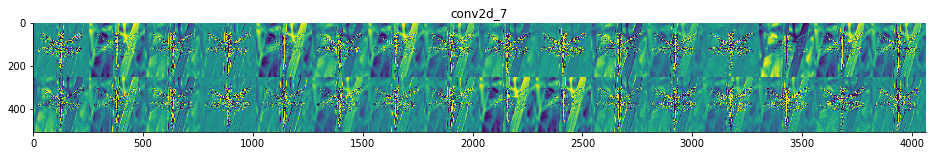

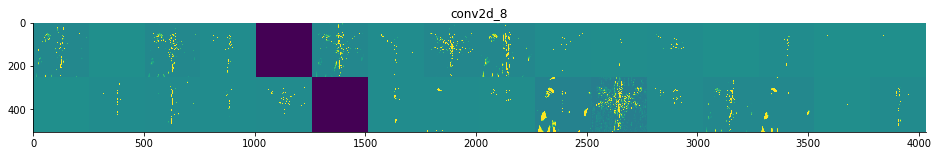

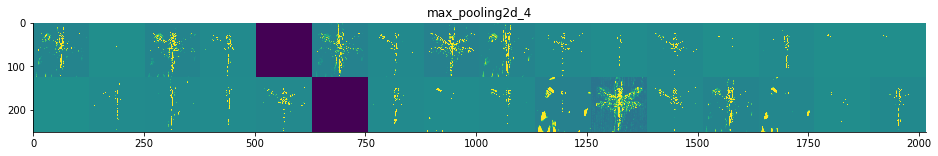

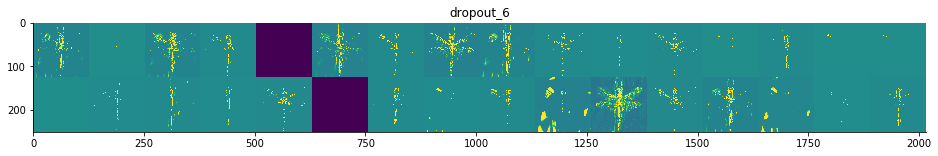

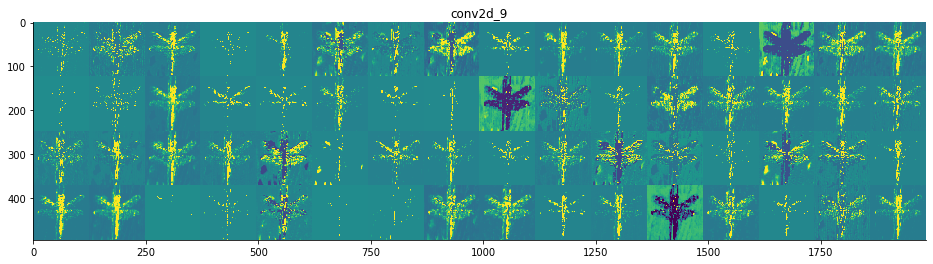

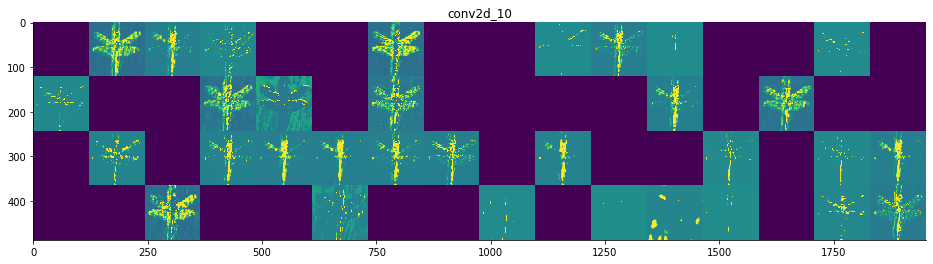

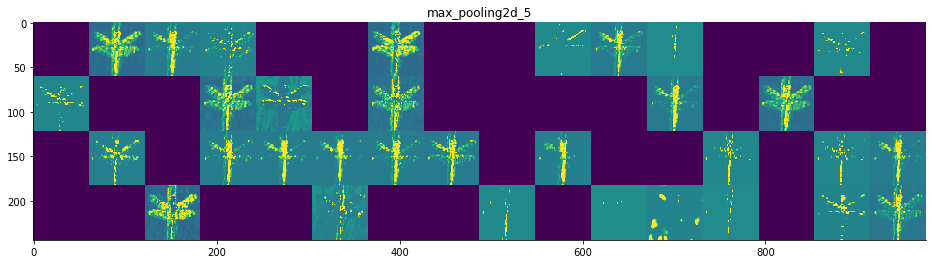

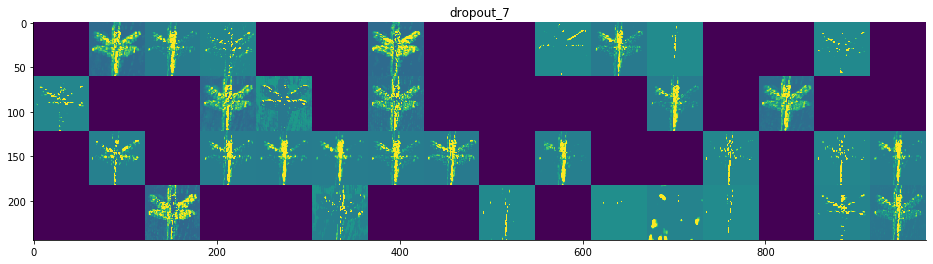

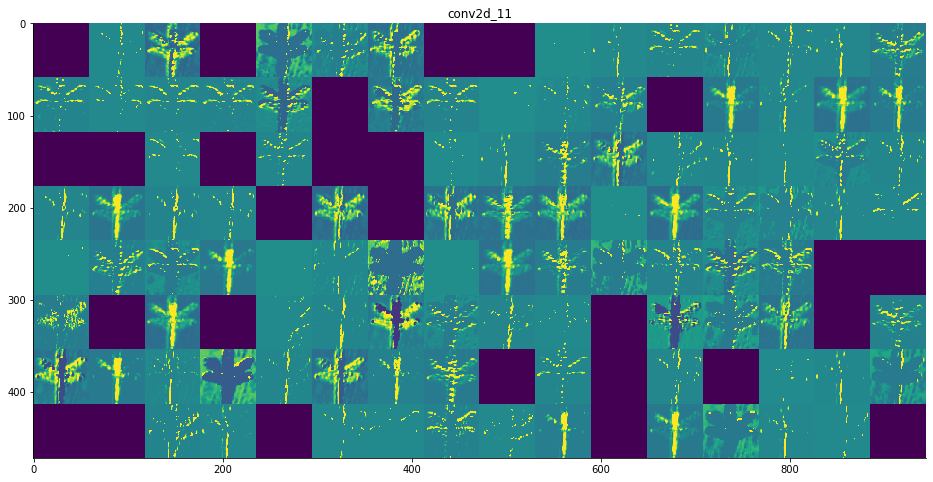

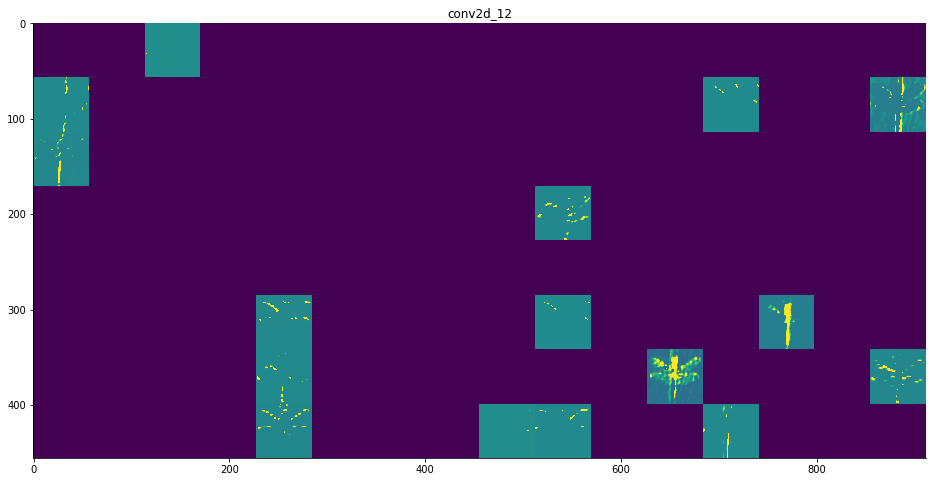

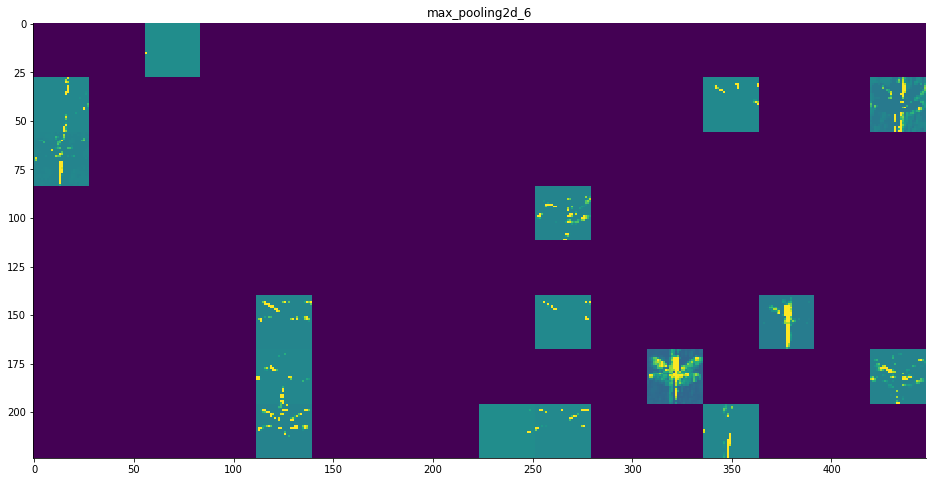

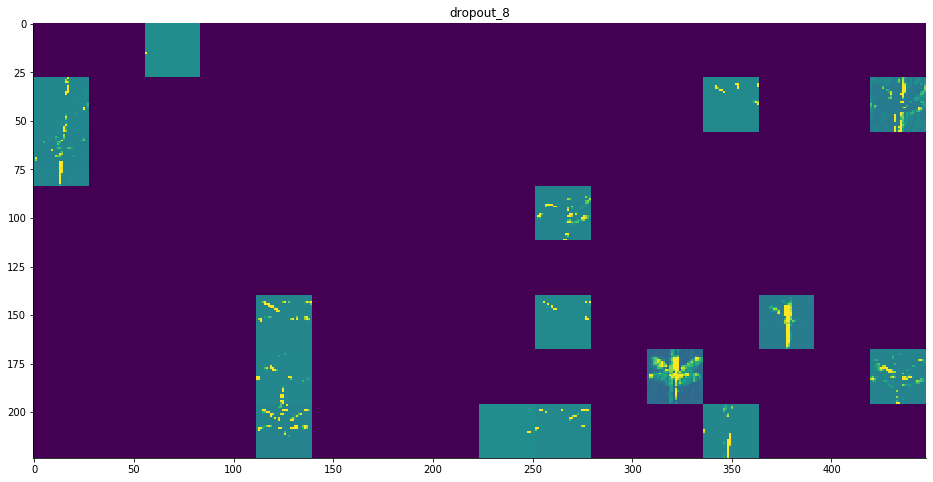

In [37]:
# visualize intermediate layers activation
hlf.plot_intermediate_activation(supervised_model, images, bottom=0, top=12, save=0)

## Visualize changes in accuracy and loss during training

In [39]:
# load model train history over the different training sets
train_path = './train_history/*'
acc, loss = hlf.load_model_stats(train_path)

In [40]:
# plot change in accuracy over the differet epochs
hlf.plot_train_history(acc, 'Accuracy', 'Accuracy', 'Epochs', save='accuracy')

In [41]:
# plot change in loss over the differet epochs
hlf.plot_train_history(loss, 'Loss', 'Loss', 'Epochs', save='loss')

## Save model's summary

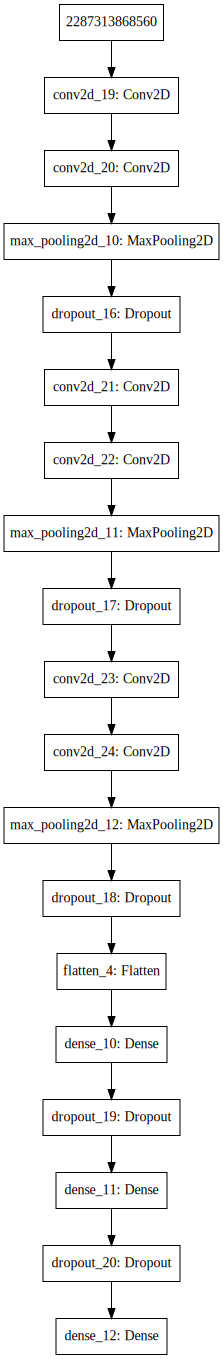

In [43]:
# plot supervised model summary
weights_path = './model_weights/'
weights_name = 'sixth2000'

supervised_model = hlf.create_model(weights_path, weights_name)
hlf.plot_model(supervised, to_file='./Images/supervised_sum.png')
SVG(model_to_dot(supervised_model).create(prog='dot', format='svg'))

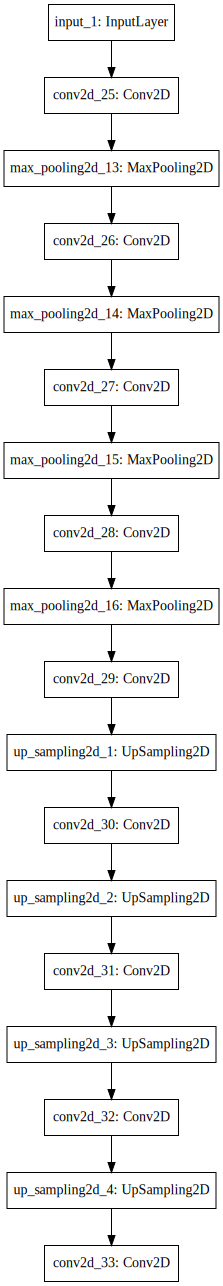

In [44]:
# plot unsupervised model summary
u_weights_path = r'D:\Linnaeus_models\\'
u_weights_name = 'dragon_reconstruction_v4_weights'

unsupervised = hlf.create_unsupervised_model(u_weights_path, u_weights_name)
hlf.plot_model(unsupervised, to_file='./Images/unsupervised_sum.png')
SVG(model_to_dot(unsupervised).create(prog='dot', format='svg'))

# Visualize classification metrics

In [2]:
# load model 
weights_path = './model_weights/'
weights_name = 'sixth2000'
supervised_model = hlf.create_model(weights_path, weights_name)






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [3]:
# load testing set
start, end = 0, -1
# load the images to train the clasifier
damsel_test_path = r'D:\Linnaeus_models\damsel\test\damsel_test.npy'
dragon_test_path = r'D:\Linnaeus_models\dragon\test\dragon_test.npy'

test_set, labels = hlf.load_data(damsel_test_path, dragon_test_path, start, end)

In [4]:
# get predictions
x_test = np.expand_dims(test_set, axis=-1)
class_prediction = supervised_model.predict_classes(x_test)

In [30]:
_, _ = hlf.print_metrics(labels, class_prediction, print_score=True)

Recall: 84.5
Accuracy: 85.77


In [6]:
# Identify where the model is wrong
misclassified = hlf.find_wrong_classification(test_set, labels, class_prediction)
# jb.dump(misclassified, r'D:\Linnaeus_models\misclassified.pkl')

['D:\\Linnaeus_models\\misclassified.pkl']

C:\Users\GILOR\Desktop\data_science\Flatiron_projects\The_Linnaeus_Bot\helper_functions.py:479: RuntimeWarning:

invalid value encountered in true_divide



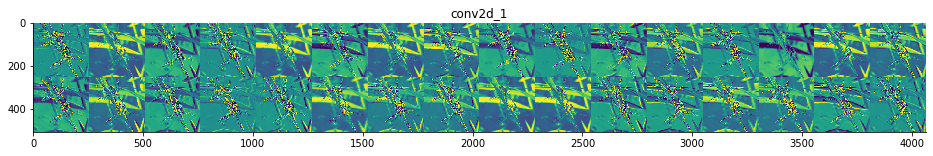

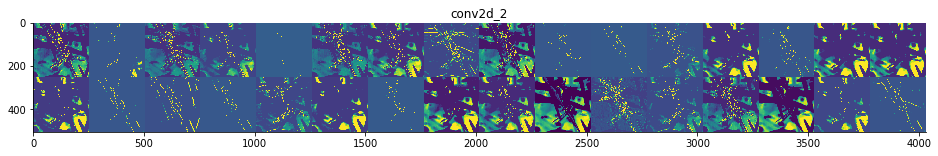

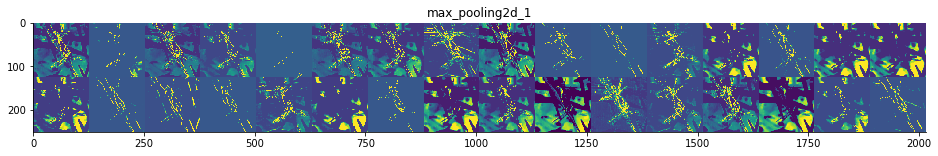

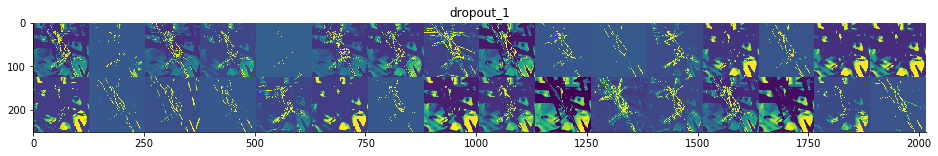

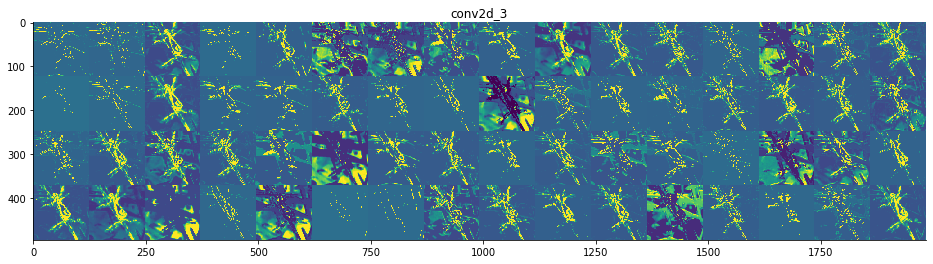

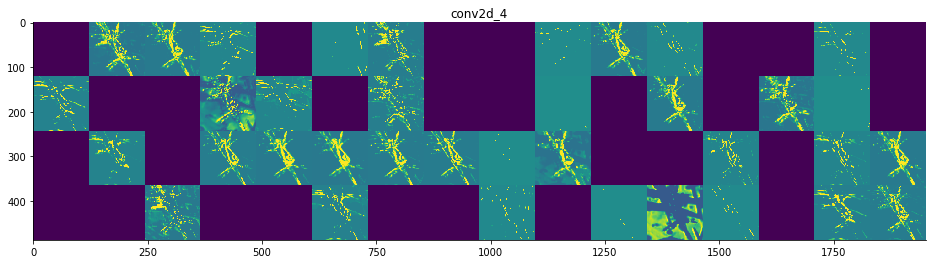

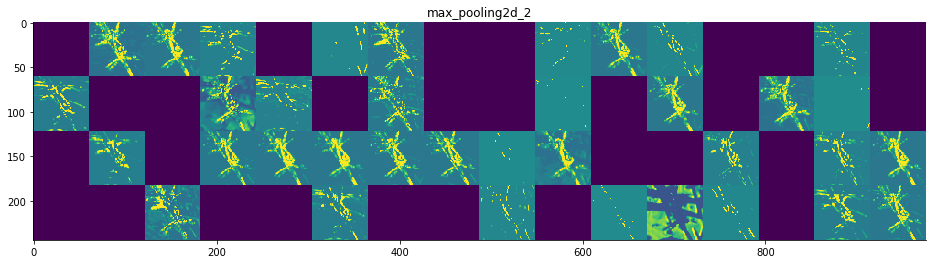

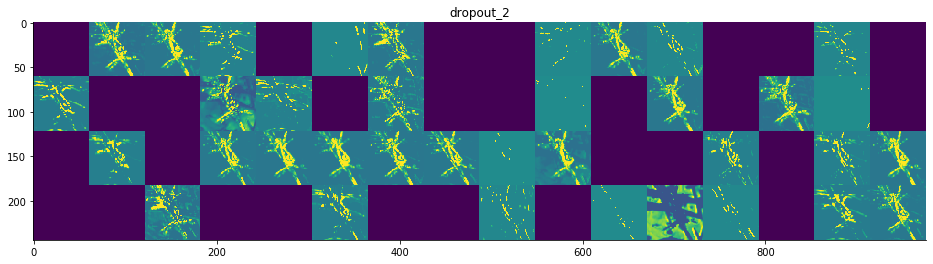

In [34]:
# visualize intermediate layers activation
hlf.plot_intermediate_activation(supervised_model, misclassified[:1], bottom=0, top=8, save=0)

C:\Users\GILOR\.conda\envs\deeplearning\lib\site-packages\ipykernel_launcher.py:46: UserWarning:

This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.



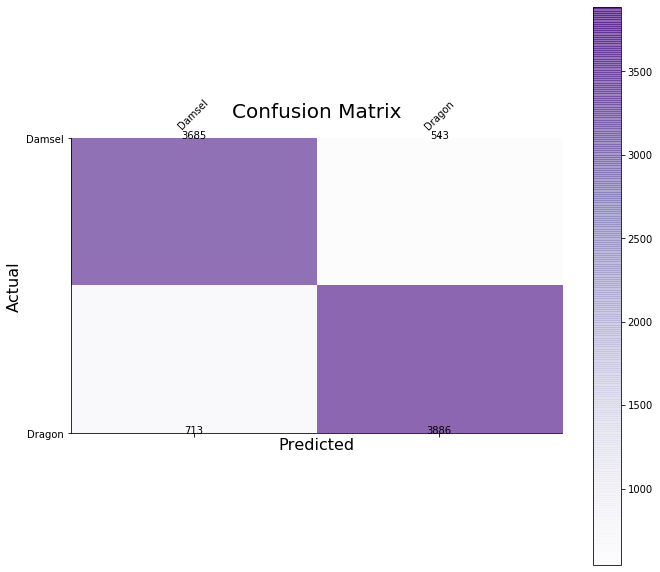

In [29]:
# Plot confusion matrix
class_names = ['Damsel', 'Dragon']
hlf.plot_confusion_matrix(labels, class_prediction, class_names, save='supervised_model')

# Visualize Unsupervised CNN

In [23]:
# load the "denoised" and original images
unsuper_images = jb.load('./test_images/unsupervised_val_images.pkl')
x_val = jb.load('./test_images/val_images.pkl')

# denoised only 
y_val = np.ones(len(x_val))
y_val = to_categorical(y_val)

In [16]:
# load model 
weights_path = './model_weights/'
weights_name = 'sixth2000'
supervised_model = hlf.create_model(weights_path, weights_name)

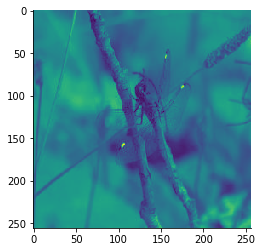

In [17]:
# Display original
plt.imshow(x_val[0].reshape(256, 256))
plt.show()

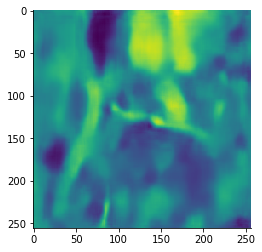

In [35]:
# Display denoised
plt.imshow(unsuper_images[0].reshape(256, 256))
plt.show()

In [44]:
filename = './unsupervised_predictions_1.pkl'
compiled_results = hlf.save_predict_class(supervised_model, unsuper_images, y_val, filename)

2407/2407 [==============================] - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 2: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 1: - ETA: 58s - ETA: 56 - ETA: 53 - ETA: 51 - ETA: 49 - ETA: 46 - ETA: 44 - ETA: 42 - ETA: 39 - ETA: 37 - ETA: 35 - ETA: 32 - ETA: 30 - ETA: 28 - ETA: 25 - ETA: 23 - ETA: 21 - ETA: 18 - ETA: 16 - ETA: 14 - ETA: 11 - ETA: 9 - ETA:  - ETA:  - ETA:  - ETA:  - 170s 71ms/step
Prediction Accuracy: 75.31252212924585%
